In [5]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sb 

In [6]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
store = pd.read_csv('store.csv')


/var/folders/5s/jcx1bbbj423bxf9z2l296d800000gn/T/ipykernel_8790/2873835997.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train.csv')


In [7]:
print('Training Data Shape : ',train.shape)
print('Test Data Shape : ',test.shape)
print('Store Data Shape : ',store.shape)

Training Data Shape :  (1017209, 9)
Test Data Shape :  (41088, 8)
Store Data Shape :  (1115, 10)


In [8]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [9]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [10]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [11]:
not_open = train[(train['Open'] == 0) & (train['Sales'] != 0)]
print("No closed store with sales: " + str(not_open.size == 0))

no_sales = train[(train['Open'] == 1) & (train['Sales'] <= 0)]
print("No open store with no sales: " + str(no_sales.size == 0))

No closed store with sales: True
No open store with no sales: False


In [12]:
train = train.loc[train['Sales'] > 0]

In [13]:
print('New Training Data Shape : ',train.shape)

New Training Data Shape :  (844338, 9)


In [14]:
dates = pd.to_datetime(train['Date']).sort_values()
dates = dates.unique()
start_date = dates[0]
end_date = dates[-1]
print("Start date: ", start_date)
print("End Date: ", end_date)
date_range = pd.date_range(start_date, end_date).values

Start date:  2013-01-01T00:00:00.000000000
End Date:  2015-07-31T00:00:00.000000000


# Visualization

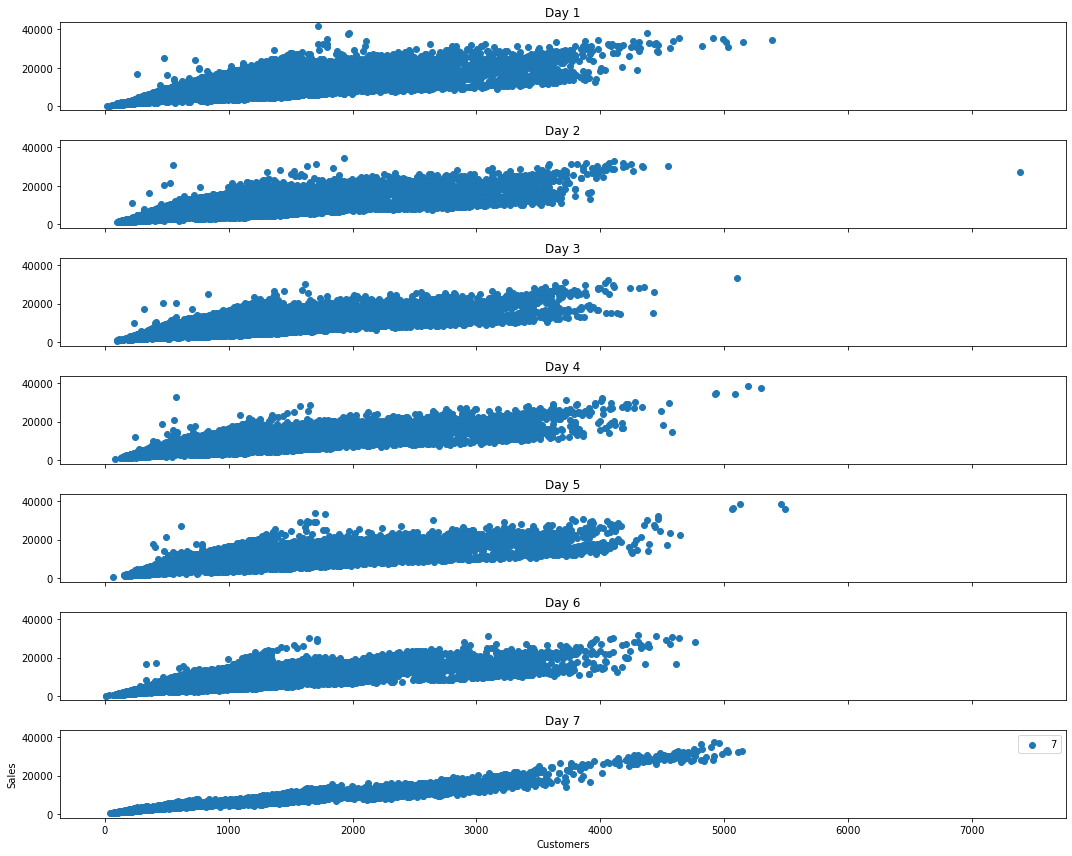

In [15]:
plt.rcParams['figure.figsize'] = (15.0, 12.0)

f, ax = plt.subplots(7, sharex=True, sharey=True)
for i in range(1, 8):
    data = train[train['DayOfWeek'] == i]
    ax[i - 1].set_title("Day {0}".format(i))
    ax[i - 1].scatter(data['Customers'], data['Sales'], label=i)

plt.legend()
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()


General Corelation between customer and sales Observed in the above plot

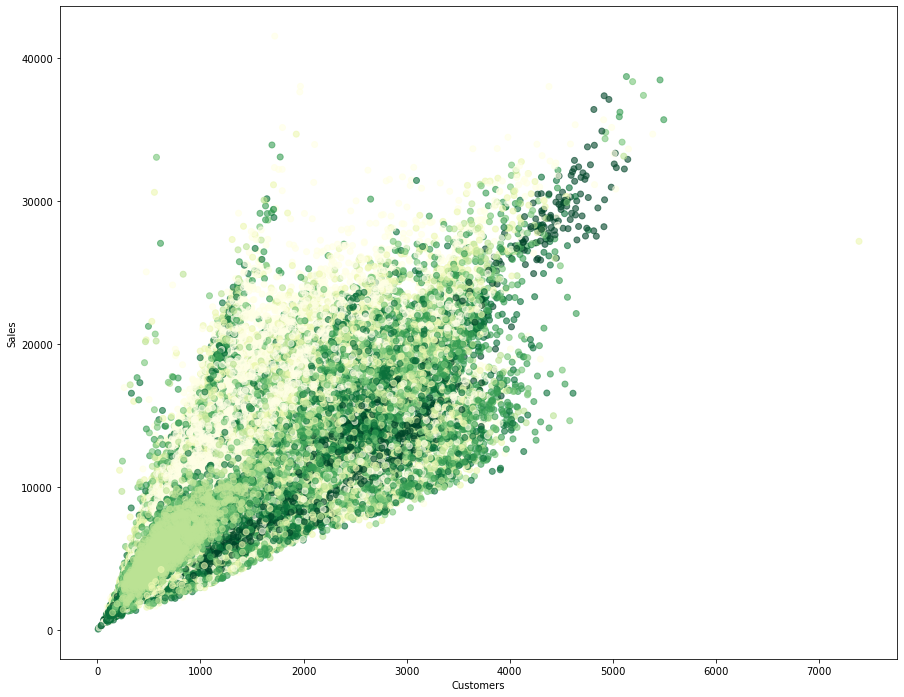

In [16]:
#ploting customer vs sales for each day of week
plt.scatter(train['Customers'], train['Sales'], c=train['DayOfWeek'], alpha=0.6, cmap=plt.cm.get_cmap('YlGn'))

plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

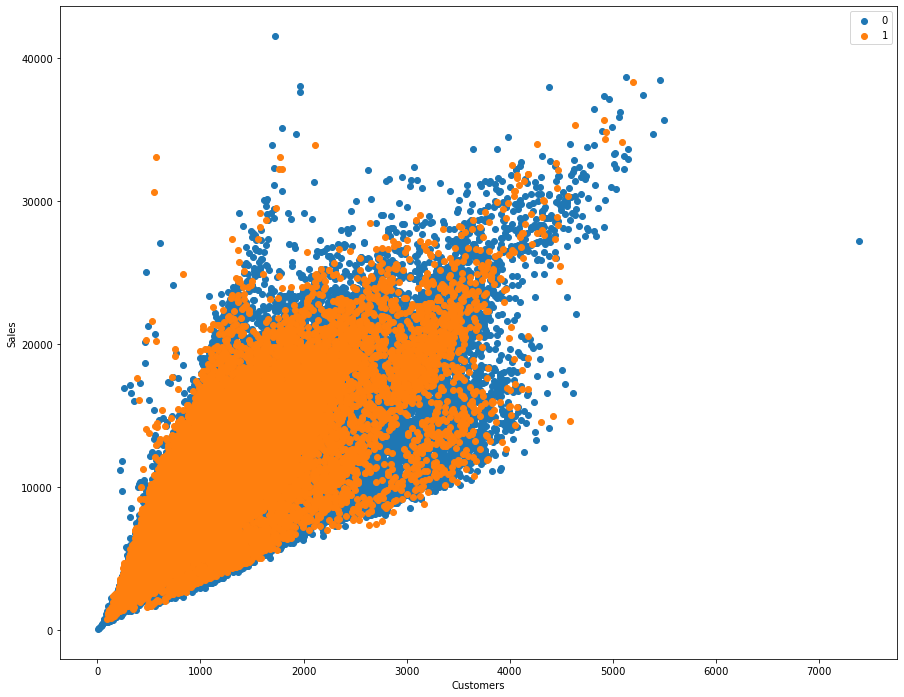

In [17]:
for i in [0, 1]:
    data = train[train['SchoolHoliday'] == i]
    if (len(data) == 0):
        continue
    plt.scatter(data['Customers'], data['Sales'], label=i)

plt.legend()
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

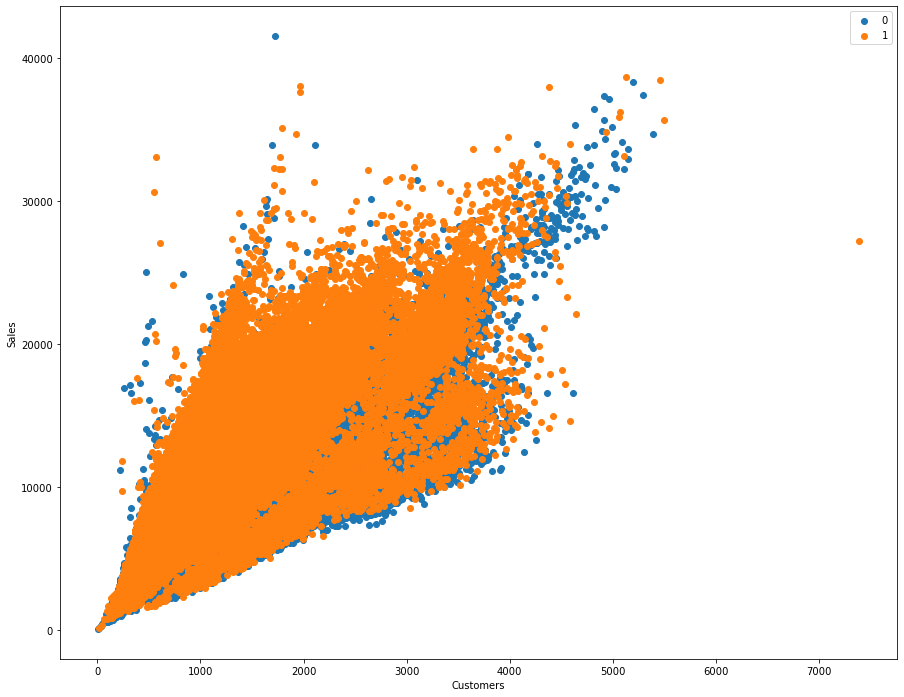

In [18]:
for i in [0, 1]:
    data = train[train['Promo'] == i]
    if (len(data) == 0):
        continue
    plt.scatter(data['Customers'], data['Sales'], label=i)

plt.legend()
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

In [19]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [20]:
train['SalesPerCustomer'] = train['Sales'] / train['Customers']

avg_store = train.groupby('Store')[['Sales', 'Customers', 'SalesPerCustomer']].mean()
avg_store.rename(columns=lambda x: 'Avg' + x, inplace=True)
store = pd.merge(avg_store.reset_index(), store, on='Store')
store.head()

,Store,AvgSales,AvgCustomers,AvgSalesPerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4759.096031,564.049936,8.393038,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,4953.900510,583.998724,8.408443,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,6942.568678,750.077022,9.117599,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,9638.401786,1321.752551,7.249827,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,4676.274711,537.340180,8.611229,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [21]:
avg_store.head()

,AvgSales,AvgCustomers,AvgSalesPerCustomer
Store,,,
1,4759.096031,564.049936,8.393038
2,4953.900510,583.998724,8.408443
3,6942.568678,750.077022,9.117599
4,9638.401786,1321.752551,7.249827
5,4676.274711,537.340180,8.611229


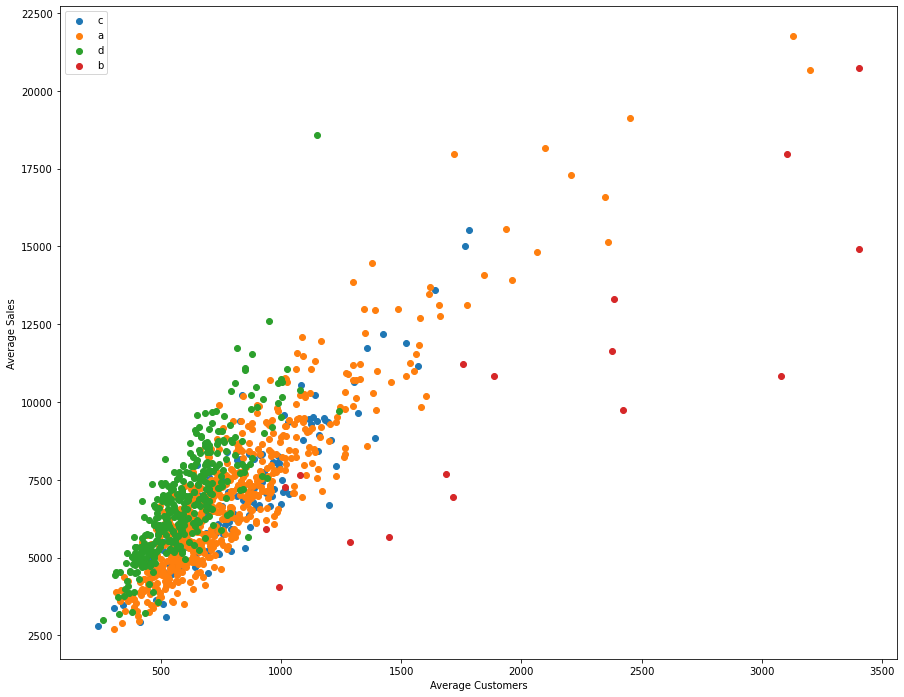

In [22]:
for i in store.StoreType.unique():
    data = store[store['StoreType'] == i]
    if (len(data) == 0):
        continue
    plt.scatter(data['AvgCustomers'], data['AvgSales'], label=i)

plt.legend()
plt.xlabel('Average Customers')
plt.ylabel('Average Sales')
plt.show()

In [23]:
store.Assortment.unique()

array(['a', 'c', 'b'], dtype=object)

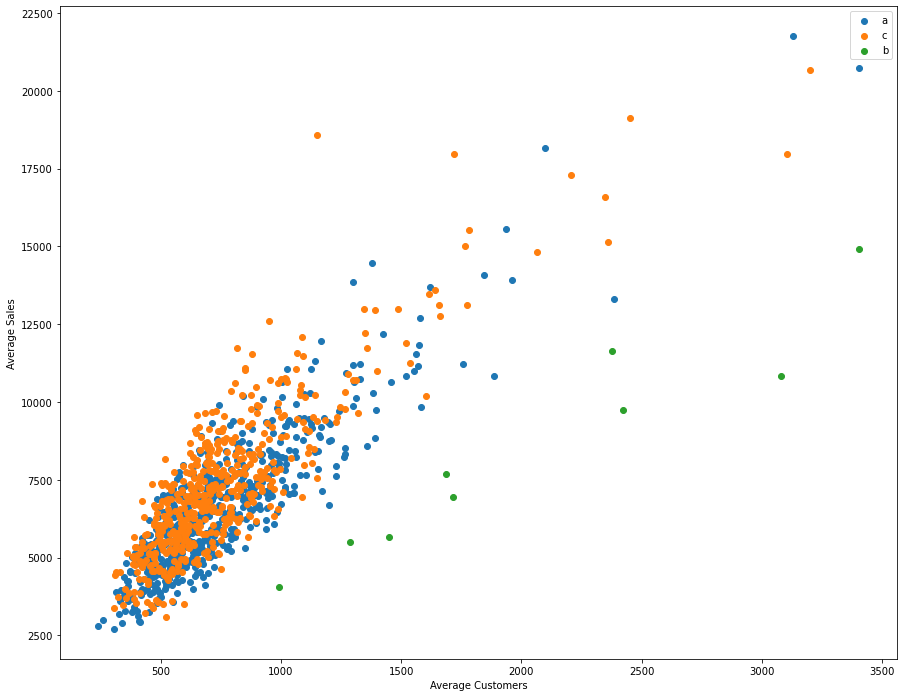

In [24]:
for i in store.Assortment.unique():
    data = store[store['Assortment'] == i]
    if (len(data) == 0):
        continue
    plt.scatter(data['AvgCustomers'], data['AvgSales'], label=i)

plt.legend()
plt.xlabel('Average Customers')
plt.ylabel('Average Sales')
plt.show()

In [25]:
store.Promo2.unique()

array([0, 1])

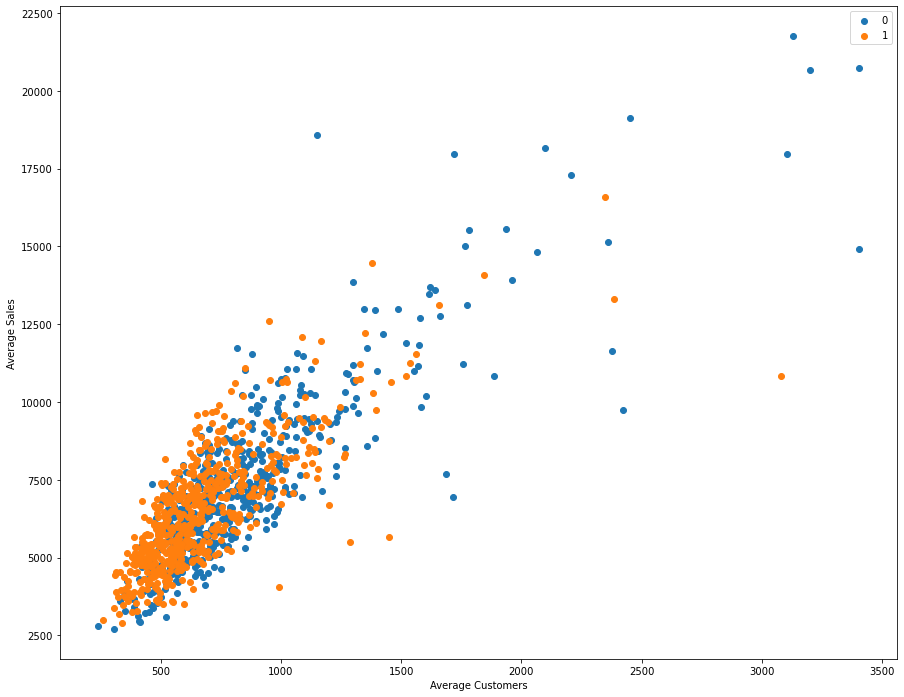

In [26]:
for i in store.Promo2.unique():
    data = store[store['Promo2'] == i]
    if (len(data) == 0):
        continue
    plt.scatter(data['AvgCustomers'], data['AvgSales'], label=i)

plt.legend()
plt.xlabel('Average Customers')
plt.ylabel('Average Sales')
plt.show()

# Feature Engineering

In [27]:
store.isnull().sum()

Store                          0
AvgSales                       0
AvgCustomers                   0
AvgSalesPerCustomer            0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

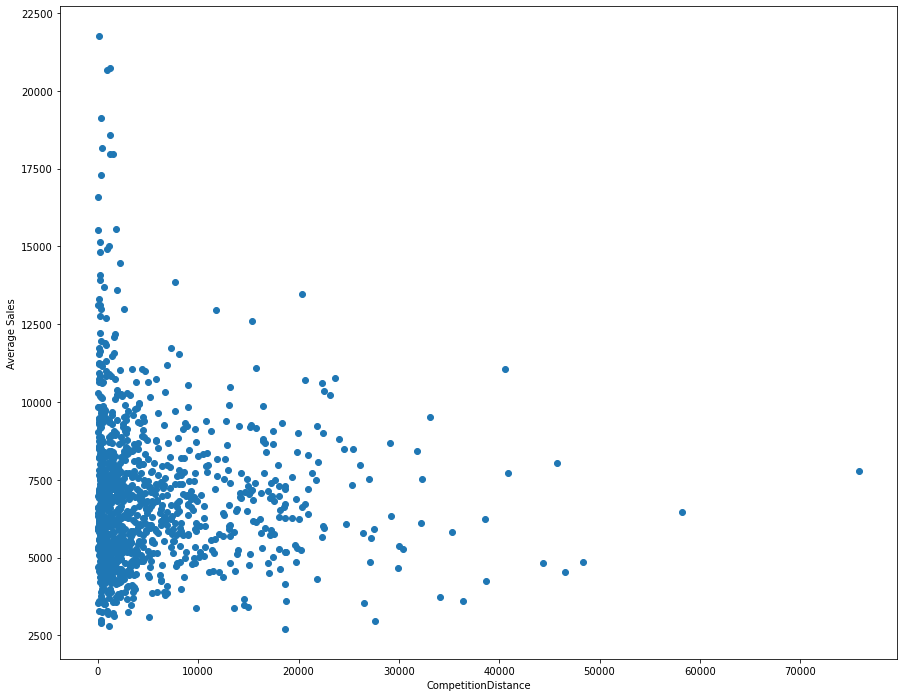

In [28]:


# fill NaN values
store["CompetitionDistance"].fillna(-1)


plt.scatter(store['CompetitionDistance'], store['AvgSales'])

plt.xlabel('CompetitionDistance')
plt.ylabel('Average Sales')
plt.show()



In [29]:
store.head()

,Store,AvgSales,AvgCustomers,AvgSalesPerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4759.096031,564.049936,8.393038,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,4953.900510,583.998724,8.408443,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,6942.568678,750.077022,9.117599,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,9638.401786,1321.752551,7.249827,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,4676.274711,537.340180,8.611229,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [30]:
store['StoreType'] = store['StoreType'].astype('category').cat.codes
store['Assortment'] = store['Assortment'].astype('category').cat.codes
train["StateHoliday"] = train["StateHoliday"].astype('category').cat.codes
store.head()

,Store,AvgSales,AvgCustomers,AvgSalesPerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4759.096031,564.049936,8.393038,2,0,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,4953.900510,583.998724,8.408443,0,0,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,6942.568678,750.077022,9.117599,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,9638.401786,1321.752551,7.249827,2,2,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,4676.274711,537.340180,8.611229,0,0,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [31]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerCustomer
0,1,5,2015-07-31,5263,555,1,1,1,1,9.482883
1,2,5,2015-07-31,6064,625,1,1,1,1,9.702400
2,3,5,2015-07-31,8314,821,1,1,1,1,10.126675
3,4,5,2015-07-31,13995,1498,1,1,1,1,9.342457
4,5,5,2015-07-31,4822,559,1,1,1,1,8.626118


In [32]:
merged = pd.merge(train, store, on='Store', how='left')
merged.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerCustomer,...,AvgSalesPerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,1,1,9.482883,...,8.393038,2,0,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,1,1,9.702400,...,8.408443,0,0,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,1,1,10.126675,...,9.117599,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,1,1,9.342457,...,7.249827,2,2,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,1,1,8.626118,...,8.611229,0,0,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [33]:
merged.shape

(844338, 22)

In [34]:
merged.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
SalesPerCustomer                  0
AvgSales                          0
AvgCustomers                      0
AvgSalesPerCustomer               0
StoreType                         0
Assortment                        0
CompetitionDistance            2186
CompetitionOpenSinceMonth    268600
CompetitionOpenSinceYear     268600
Promo2                            0
Promo2SinceWeek              423292
Promo2SinceYear              423292
PromoInterval                423292
dtype: int64

In [35]:
# remove NaNs
merged.fillna(0, inplace=True)

In [36]:
merged['Date'] = pd.to_datetime(merged['Date'])
merged.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                           int8
SchoolHoliday                         int64
SalesPerCustomer                    float64
AvgSales                            float64
AvgCustomers                        float64
AvgSalesPerCustomer                 float64
StoreType                              int8
Assortment                             int8
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
dtype: object

In [37]:
merged['Year'] = merged.Date.dt.year
merged['Month'] = merged.Date.dt.month
merged['Day'] = merged.Date.dt.day
merged['Week'] = merged.Date.dt.week
merged.head()

/var/folders/5s/jcx1bbbj423bxf9z2l296d800000gn/T/ipykernel_8790/3339487263.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  merged['Week'] = merged.Date.dt.week


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerCustomer,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,Week
0,1,5,2015-07-31,5263,555,1,1,1,1,9.482883,...,9.0,2008.0,0,0.0,0.0,0,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,1,1,9.702400,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,1,1,10.126675,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,1,1,9.342457,...,9.0,2009.0,0,0.0,0.0,0,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,1,1,8.626118,...,4.0,2015.0,0,0.0,0.0,0,2015,7,31,31


In [38]:
# Number of months that competition has existed for
merged['MonthsCompetitionOpen'] = 12 * (merged['Year'] - merged['CompetitionOpenSinceYear']) + (merged['Month'] - merged['CompetitionOpenSinceMonth'])
merged.loc[merged['CompetitionOpenSinceYear'] == 0, 'MonthsCompetitionOpen'] = 0


In [39]:
    
    # Number of weeks that promotion has existed for
merged['WeeksPromoOpen'] = 12 * (merged['Year'] - merged['Promo2SinceYear']) + (merged['Date'].dt.weekofyear - merged['Promo2SinceWeek'])
merged.loc[merged['Promo2SinceYear'] == 0, 'WeeksPromoOpen'] = 0

/var/folders/5s/jcx1bbbj423bxf9z2l296d800000gn/T/ipykernel_8790/1454331195.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  merged['WeeksPromoOpen'] = 12 * (merged['Year'] - merged['Promo2SinceYear']) + (merged['Date'].dt.weekofyear - merged['Promo2SinceWeek'])


In [40]:
merged.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                           int8
SchoolHoliday                         int64
SalesPerCustomer                    float64
AvgSales                            float64
AvgCustomers                        float64
AvgSalesPerCustomer                 float64
StoreType                              int8
Assortment                             int8
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
Year                            

In [41]:
toInt = [
        'CompetitionOpenSinceMonth',
        'CompetitionOpenSinceYear',
        'Promo2SinceWeek', 
        'Promo2SinceYear', 
        'MonthsCompetitionOpen', 
        'WeeksPromoOpen']

merged[toInt] = merged[toInt].astype(int)


In [42]:
med_store = train.groupby('Store')[['Sales', 'Customers', 'SalesPerCustomer']].median()
med_store.rename(columns=lambda x: 'Med' + x, inplace=True)

store = pd.merge(med_store.reset_index(), store, on='Store')


In [43]:
store.head()

,Store,MedSales,MedCustomers,MedSalesPerCustomer,AvgSales,AvgCustomers,AvgSalesPerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4647.0,550.0,8.362376,4759.096031,564.049936,8.393038,2,0,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,4783.0,575.5,8.313092,4953.900510,583.998724,8.408443,0,0,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,6619.0,744.0,9.123440,6942.568678,750.077022,9.117599,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,9430.5,1301.5,7.215175,9638.401786,1321.752551,7.249827,2,2,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,4616.0,564.0,8.584677,4676.274711,537.340180,8.611229,0,0,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [44]:
merged = pd.merge(med_store.reset_index(), merged, on='Store')
merged.head()

,Store,MedSales,MedCustomers,MedSalesPerCustomer,DayOfWeek,Date,Sales,Customers,Open,Promo,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,Week,MonthsCompetitionOpen,WeeksPromoOpen
0,1,4647.0,550.0,8.362376,5,2015-07-31,5263,555,1,1,...,0,0,0,0,2015,7,31,31,82,0
1,1,4647.0,550.0,8.362376,4,2015-07-30,5020,546,1,1,...,0,0,0,0,2015,7,30,31,82,0
2,1,4647.0,550.0,8.362376,3,2015-07-29,4782,523,1,1,...,0,0,0,0,2015,7,29,31,82,0
3,1,4647.0,550.0,8.362376,2,2015-07-28,5011,560,1,1,...,0,0,0,0,2015,7,28,31,82,0
4,1,4647.0,550.0,8.362376,1,2015-07-27,6102,612,1,1,...,0,0,0,0,2015,7,27,31,82,0


In [45]:
merged.columns

Index(['Store', 'MedSales', 'MedCustomers', 'MedSalesPerCustomer', 'DayOfWeek',
       'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'SalesPerCustomer', 'AvgSales', 'AvgCustomers',
       'AvgSalesPerCustomer', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
       'Day', 'Week', 'MonthsCompetitionOpen', 'WeeksPromoOpen'],
      dtype='object')

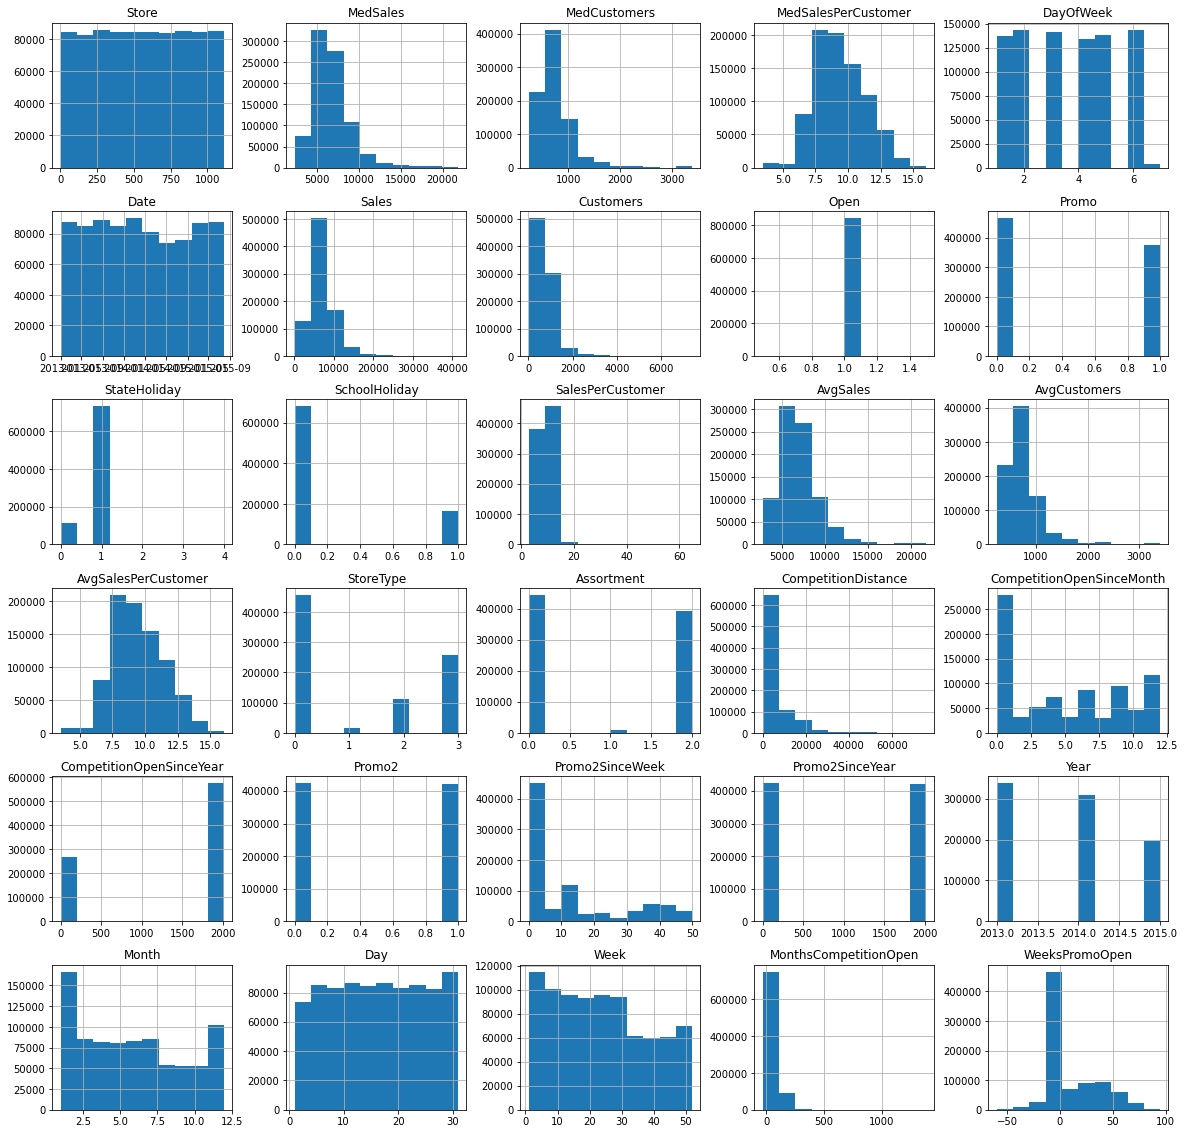

In [46]:
merged.hist(figsize=(20,20))
plt.show()

In [47]:
#merged[X].head()

NameError: name 'X' is not defined

# Model Building and Evaluation

In [ ]:
# 'Store', 'MedSales', 'MedCustomers', 'MedSalesPerCustomer', 'DayOfWeek',
#        'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday',
#        'SchoolHoliday', 'SalesPerCustomer', 'AvgSales', 'AvgCustomers',
#        'AvgSalesPerCustomer', 'StoreType', 'Assortment', 'CompetitionDistance',
#        'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
#        'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
#        'Day', 'Week', 'MonthsCompetitionOpen', 'WeeksPromoOpen'],

In [48]:
from sklearn.model_selection import train_test_split
X = [
    'Store', 
    'Customers',
    'CompetitionDistance', 

    'Promo', 
    'Promo2', 

    'CompetitionOpenSinceMonth',
    'CompetitionOpenSinceYear',
    'Promo2SinceWeek',
    'Promo2SinceYear',

    
    'StateHoliday',
    'StoreType',
    'Assortment',

    'AvgSales',
    'AvgCustomers',
    'AvgSalesPerCustomer',
    
    'MedSales',
    'MedCustomers',
    'MedSalesPerCustomer',

    'DayOfWeek',
    'Week',
    'Day',
    'Month',
    'Year',

]
X_data = merged[X]
Y_data = np.log(merged['Sales'])
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.20, random_state=10)

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer,mean_squared_error



def plot_importance(model):
    k = list(zip(X, model.feature_importances_))
    k.sort(key=lambda tup: tup[1])

    labels, vals = zip(*k)
    
    plt.barh(np.arange(len(X)), vals, align='center')
    plt.yticks(np.arange(len(X)), labels)

In [ ]:
%%time
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

param ={
            'n_estimators': [100,500, 1000,1500],
            'max_depth':[2,4,6,8]
        }

xgboost_tree = xgb.XGBRegressor(
    eta = 0.1,
    min_child_weight = 2,
    subsample = 0.8,
    colsample_bytree = 0.8,
    tree_method = 'exact',
    reg_alpha = 0.05,
    silent = 0,
    random_state = 1023
)

grid = GridSearchCV(estimator=xgboost_tree,param_grid=param,cv=5,  verbose=1, n_jobs=-1,scoring='neg_mean_squared_error')
   
    

    
grid_result = grid.fit(X_train, y_train)
best_params = grid_result.best_params_

print('Best Params :',best_params)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [ ]:
from math import sqrt

pred = grid_result.predict(X_test)
print('Root Mean squared error {}'.format(sqrt(mean_squared_error(np.exp(y_test), np.exp(pred)))))

In [ ]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys()) 
